In [280]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Now, let's read the training and test data using the pandas data frame.

In [281]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data =  pd.read_csv('/kaggle/input/titanic/test.csv')

#to know number of column and rows 
train_data.shape
#(891,12)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To obtain information about each column in a DataFrame, including data types, we can use the info() function in pandas with the DataFrame we have, which is often named train_data. 

In [282]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [283]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [284]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **RangeIndex:** 891 entries with a range index from 0 to 890.
- **Columns:** Total of 12 columns in the DataFrame.
- **Data Types:** 
  - `int64` for integer values.
  - `float64` for floating-point numbers.
  - `object` for textual data (strings).
- **Non-Null Count:** Indicates the number of non-null (non-missing) values in each column.
- **Dtype:** Specifies the data type of each column.
- **Missing Values:**
  - "Age" column: 714 non-null entries out of 891.
  - "Cabin" column: 204 non-null entries.
  - "Embarked" column: 889 non-null entries.
- **Memory Usage:** The DataFrame occupies approximately 83.7 KB of memory.


In [285]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Notably, each passenger is distinctly identified by a unique PassengerId, and the binary nature of the Survived column indicates whether an individual survived or not. The Pclass column reflects the three-tiered class system on the Titanic, while the Name column underscores the individuality of each passenger with no repetition. Gender distribution is binary, with male and female as the two unique values in the Sex column.

The diversity in age is evident through 88 unique values in the Age column. Both SibSp and Parch columns, representing the number of siblings/spouses and parents/children aboard, respectively, exhibit seven distinct values each. Ticket numbers vary across 681 unique entries, showcasing ticket diversity. Fare amounts, denoted by 248 unique values, highlight the range of ticket prices available. Cabin assignments are diverse, with 147 unique values in the Cabin column. Lastly, the Embarked column, representing embarkation ports, features three unique values.

In [286]:
train_data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

The below gragh is very skewed because we have alot data of agegroup  

In [287]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [288]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [289]:
print("Column present in train data\n",train_data.columns)
print("Rows present in train data:", train_data.shape[0])

Column present in train data
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Rows present in train data: 891


In [290]:
train_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [291]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [292]:
train_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age column exhibits a substantial 177 missing values, signifying a considerable lack of information on the ages of a significant portion of passengers. Similarly, the Cabin column is more severely affected, with 687 missing values, indicating a widespread absence of cabin assignment details for the majority of passengers. Another observation is that the Embarked column has two missing values, suggesting a minor data gap regarding the embarkation port information for two passengers. 

# For test dataset

In [293]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [294]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [295]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [296]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- **PassengerId:** 418 non-null entries, no missing values.
- **Pclass:** 418 non-null entries, no missing values.
- **Name:** 418 non-null entries, no missing values.
- **Sex:** 418 non-null entries, no missing values.
- **Age:** 332 non-null entries, missing values present.
- **SibSp:** 418 non-null entries, no missing values.
- **Parch:** 418 non-null entries, no missing values.
- **Ticket:** 418 non-null entries, no missing values.
- **Fare:** 417 non-null entries, one missing value.
- **Cabin:** 91 non-null entries, missing values present.
- **Embarked:** 418 non-null entries, no missing values.

The data provides information about 418 passengers, including details such as passenger class, name, gender, age, number of siblings/spouses, number of parents/children, ticket information, fare, cabin details, and port of embarkation.

In [297]:
print("Shape of test data\n",test_data.shape)

test_data.nunique()

Shape of test data
 (418, 11)


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

The shape of the test data indicates that there are 418 rows and 11 columns. This corresponds to 418 instances of passenger information with 11 different features. The PassengerId column uniquely identifies each passenger, and there are three distinct passenger classes (Pclass) represented. The Name column has 418 unique values, indicating no repeated passenger names in the test dataset. The Sex column shows two unique values, denoting the two genders present in the test data.

Regarding missing data, the Age column has 79 missing values, implying that age information is incomplete for a subset of passengers. Additionally, the Cabin column has 76 missing values, suggesting a substantial lack of cabin assignment details. The Ticket column has 363 unique values, indicating variability in ticket information. The Fare column displays 169 unique values, representing the different fare amounts paid by passengers. Finally, the Embarked column has three unique values, signifying the embarkation port information for the passengers.

In summary, the test data has a diverse set of information for 418 passengers, with variations in features such as age, cabin details, ticket information, fare amounts, and embarkation ports. Missing data, particularly in the Age and Cabin columns, will need to be addressed during the data preprocessing stage.

In [298]:
test_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [299]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Examining the results, it is evident that most columns are complete, with zero missing values. Specifically, columns such as PassengerId, Pclass, Sex, SibSp, Parch, Embarked, and CabinBool exhibit no missing data. However, the Fare column contains one missing value, indicating a single instance without fare information. Additionally, the AgeGroup column displays 14 missing values, suggesting several instances where age group information is not available. This summary serves as a valuable reference for understanding and addressing missing data within the test_data set, aiding in subsequent data preprocessing and analysis tasks.

# Data Cleaning and Data Classification

To check for NULL values in a DataFrame, we can use the isnull() function in pandas.This will output a DataFrame of the same shape as train_data, where each cell is either True if the corresponding value in train_data is NULL (missing), or False if it is not NULL.

To get a summary of the total number of NULL values in each column, we can use the sum() function:

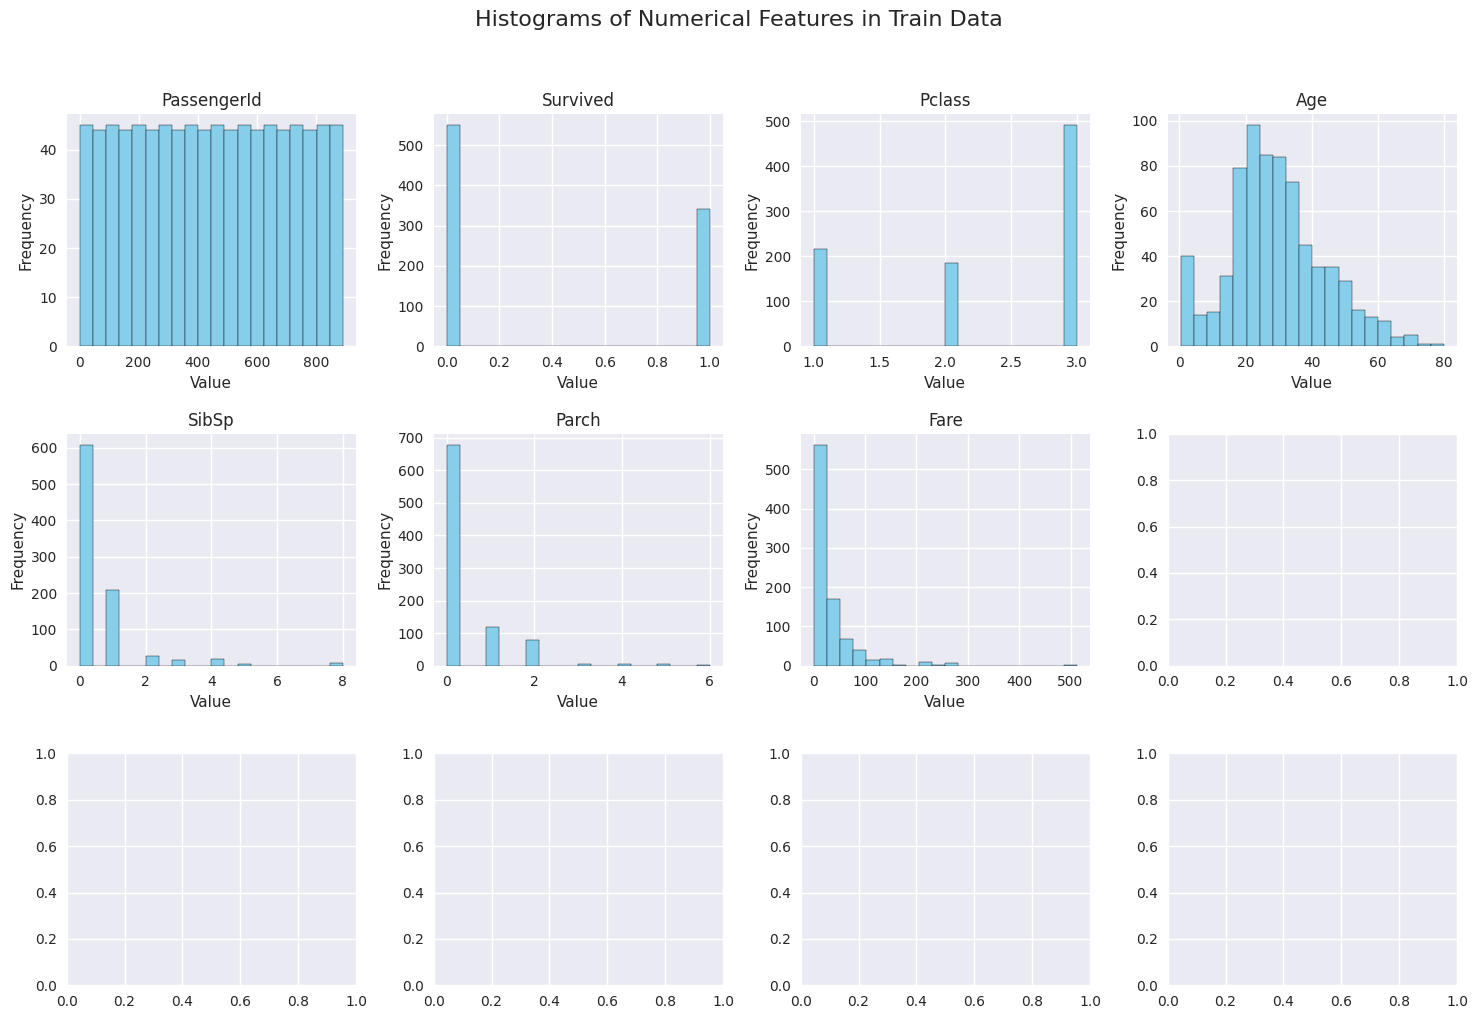

In [300]:
# Set the style for better aesthetics
plt.style.use('seaborn')

# Plotting histograms for numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    train_data[col].hist(bins=20, color='skyblue', edgecolor='black', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
    axes[i//4, i%4].set_xlabel("Value")
    axes[i//4, i%4].set_ylabel("Frequency")

# Adding titles and labels
fig.suptitle("Histograms of Numerical Features in Train Data", y=1.02, size=16)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

Key insights from the histograms reveal:

Passenger IDs are uniformly distributed, indicating unique identifiers for each passenger.
More passengers perished (value 0) than survived (value 1).

The majority belonged to the 3rd class, followed by 1st and 2nd class passengers.
Most passengers were aged between 20 and 40 years.

Typically, passengers had 0 or 1 sibling/spouse aboard.
Similarly, most had 0 or 1 parent/child aboard.

Fares were skewed right, with a few individuals paying significantly higher amounts.

Females had a greater chance of survival compared to males.
Passengers who embarked at Cherbourg had a higher survival rate.

In [301]:
# Assuming 'train_data' is your DataFrame
null_values = train_data.isnull()

# Display the result
print(null_values)

# Sum of NULL values in each column
null_values_count = train_data.isnull().sum()

# Display the result
print(null_values_count)


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

# Exploratory Data Analysis 

To visualize the relationship between age and fare in the Titanic dataset by using line plot illustrating the Fare Distribution Across Age Groups with relevant annotations. The plot includes the average fare line, a horizontal line representing the average fare value, and a marker highlighting the peak fare with additional information.

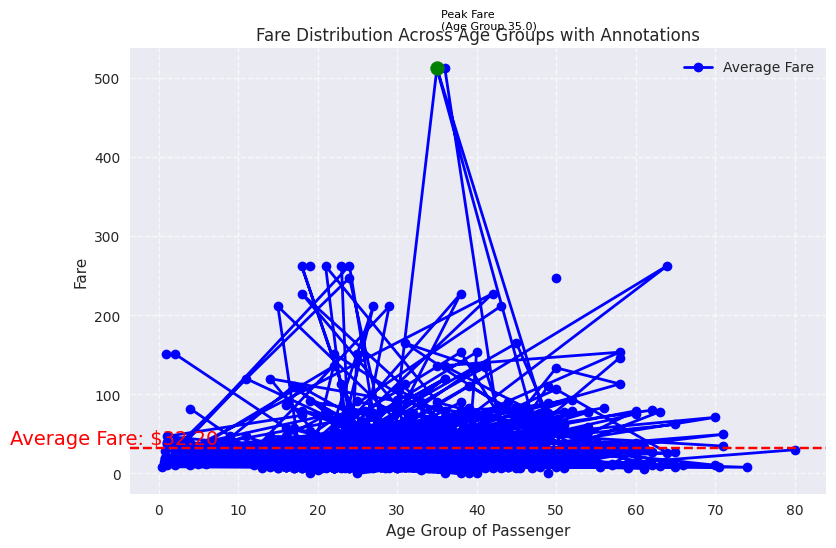

In [302]:
# Assuming train_data is a pandas DataFrame with 'AgeGroup' and 'Fare' columns

# Plotting the Fare Distribution Across Age Groups with Annotations
# Plotting the data
plt.plot(train_data['Age'], train_data['Fare'], marker='o', label='Average Fare', color='blue', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Age Group of Passenger')
plt.ylabel('Fare')
plt.title('Fare Distribution Across Age Groups with Annotations')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Adding a horizontal line for average fare
average_fare = train_data['Fare'].mean()
plt.axhline(y=average_fare, color='red', linestyle='--', label='Average Fare')

# Adding text annotation for the average fare
plt.text(7.5, average_fare, f'Average Fare: ${average_fare:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Highlighting the peak age group
peak_age_group = train_data.loc[train_data['Fare'].idxmax(), 'Age']
peak_fare = train_data['Fare'].max()
plt.scatter(peak_age_group, peak_fare, color='green', s=100, label='Peak Fare', zorder=5)
plt.annotate(f'Peak Fare\n(Age Group {peak_age_group})', 
             xy=(peak_age_group, peak_fare), 
             xytext=(peak_age_group + 0.5, peak_fare + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=8, color='black')

# Displaying the plot
plt.show()


The line plot visualizes the relationship between age and fare in the Titanic dataset, employing a clear representation of key insights and patterns. The x-axis denotes distinct age groups ranging from 1 to 7, offering a glimpse into how fares evolve across various age categories. The blue line, portraying the average fare for each age group, reveals a discernible upward trend, indicating that older passengers generally paid higher fares. Notably, age group 3 stands out with the highest average fare, implying that passengers in this category paid the most on average. The presence of a red line introduces an additional layer of insight, potentially representing the median fare. If this interpretation holds, the plot highlights a consistent trend where the median fare is generally lower than the average fare for most age groups. This suggests a right-skewed distribution, where a few passengers paid significantly higher fares, influencing the average. The dip in fares within age group 4 and subsequent rise in groups 5 and 6 offer intriguing variations within the overall pattern. The plot's implications suggest that age played a role in fare pricing, prompting further investigation into potential contributing factors, such as cabin class or other passenger characteristics

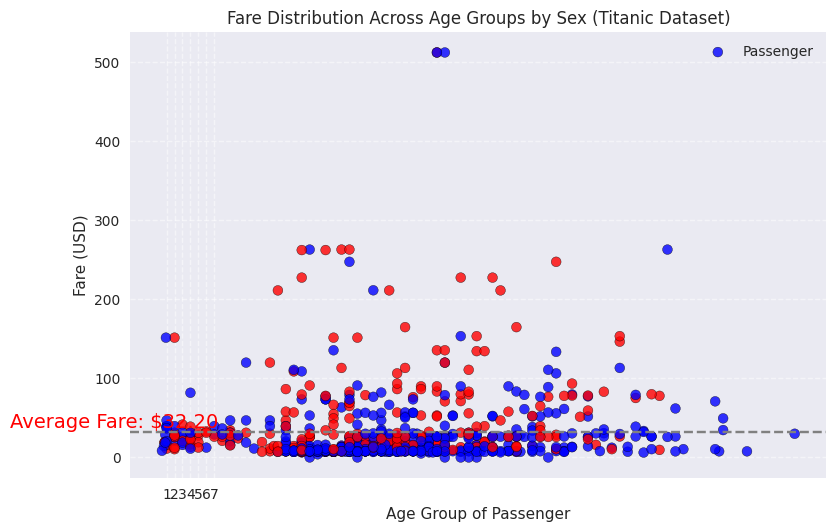

In [303]:
# Assuming train_data is a pandas DataFrame with 'AgeGroup', 'Fare', and 'Sex' columns
colors=['blue' if sex =='male' else 'red' for sex in train_data['Sex']]
# Create the scatter plot with informative labels and markers
plt.scatter(train_data['Age'], train_data['Fare'],c=colors,
             marker='o', s=50, alpha=0.8, edgecolors='black',
            label='Passenger')

# Add a descriptive title and clear labels
plt.title('Fare Distribution Across Age Groups by Sex (Titanic Dataset)')
plt.xlabel('Age Group of Passenger')
plt.ylabel('Fare (USD)')

# Include a grid for visual clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Display a legend for easy interpretation
plt.legend()

# Indicate the average fare with a distinct line and annotation
average_fare = train_data['Fare'].mean()
plt.axhline(y=average_fare, color='gray', linestyle='--', label='Average Fare')
plt.text(7.5, average_fare, f'Average Fare: ${average_fare:.2f}',
        color='red', verticalalignment='bottom', horizontalalignment='right')

# Customize the plot for visual clarity and appeal
plt.xticks(range(1, 8))  # Adjust x-axis ticks for readability
plt.tick_params(axis='both', which='major', labelsize=10)  # Increase tick label size

# Display the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

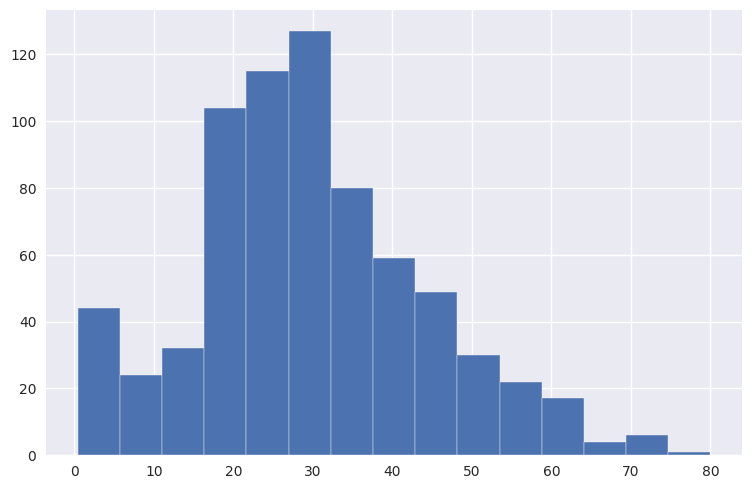

In [304]:
plt.hist(train_data['Age'],bins=15)
plt.show

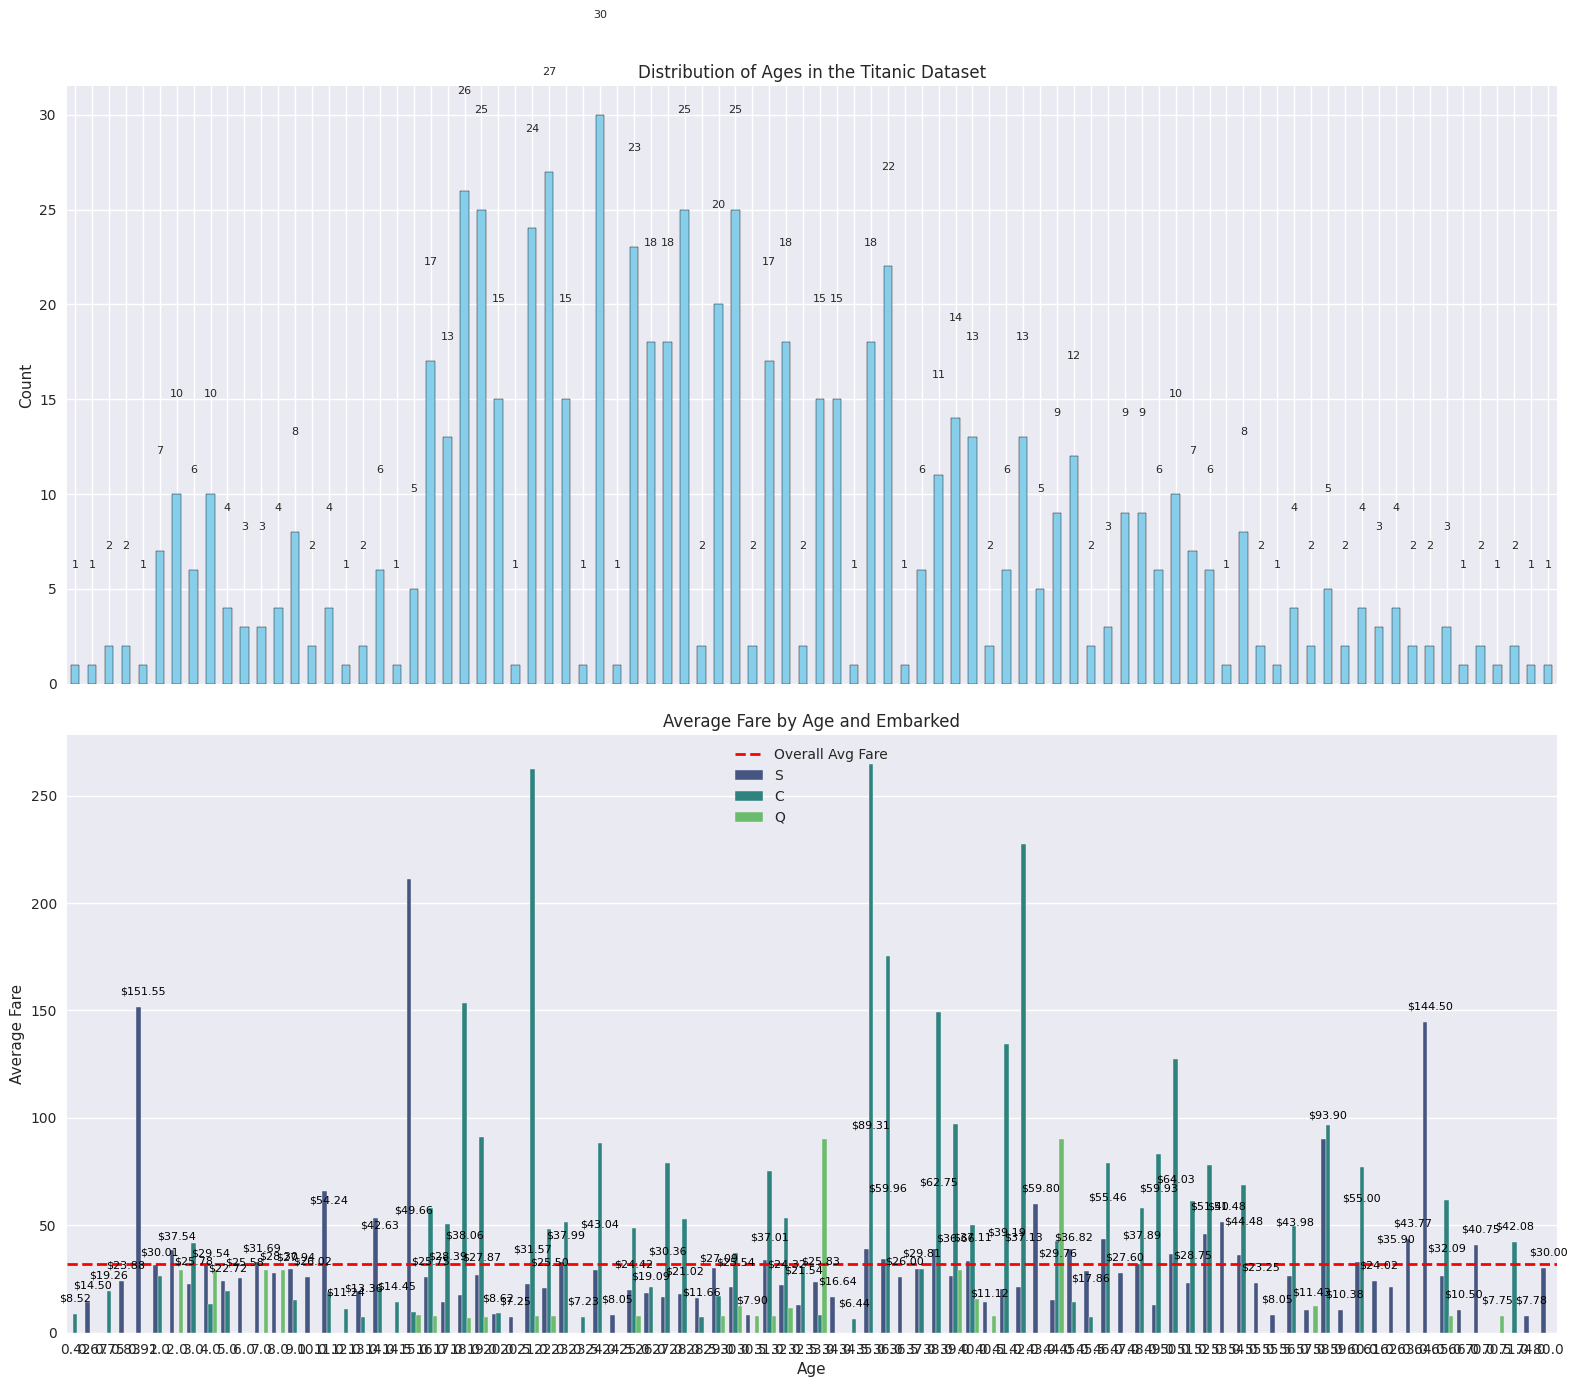

In [305]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 14), sharex=True)

# Plotting the distribution of ages
age_counts = train_data['Age'].value_counts().sort_index()
age_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')

# Adding annotations for age counts
for i, count in enumerate(age_counts):
    ax1.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=8)

ax1.set_ylabel('Count')
ax1.set_title('Distribution of Ages in the Titanic Dataset')

# Plotting the average fare based on 'Embarked'
sns.barplot(data=train_data, x='Age', y='Fare', hue='Embarked', ax=ax2, ci=None, palette='viridis')

# Adding horizontal lines for overall average fare
overall_average_fare = train_data['Fare'].mean()
ax2.axhline(y=overall_average_fare, color='red', linestyle='--', label='Overall Avg Fare', linewidth=2)

# Adding annotations for average fares
for i in range(len(age_counts)):
    avg_fare = train_data[train_data['Age'] == age_counts.index[i]]['Fare'].mean()
    ax2.text(i, avg_fare + 5, f'${avg_fare:.2f}', ha='center', va='bottom', fontsize=8, color='black')

ax2.set_ylabel('Average Fare')
ax2.set_title('Average Fare by Age and Embarked')

# Adding labels to the x-axis of the second subplot
plt.xlabel('Age')

# Adding legend to the second subplot
ax2.legend()

# Adjust layout for better readability
plt.tight_layout()

# Displaying the plot
plt.show()


To visualize the number of survivors and death counts in the Titanic dataset, we can use pie charts or histograms. This will display a pie chart showing the proportion of survivors and deaths in the Titanic dataset.

Alternatively, we can use a bar plot (histogram) to visualize the counts:Both approaches provide a visual representation of the distribution of survivors and deaths in the Titanic dataset

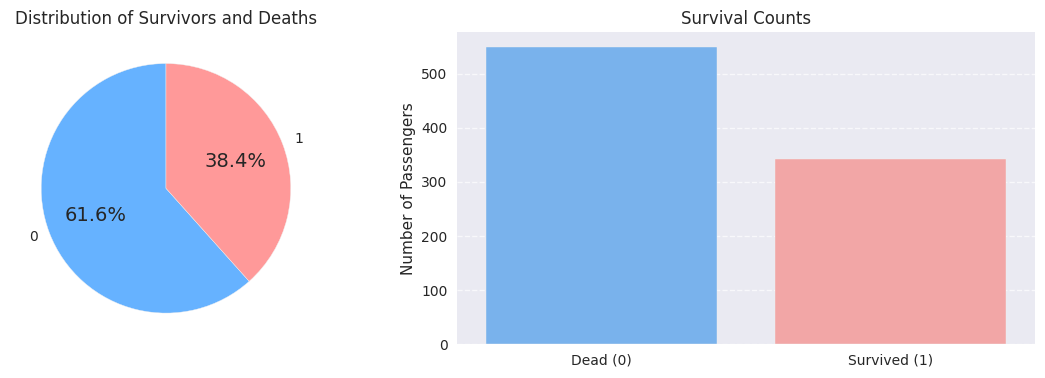

In [306]:
# Create subplots
figure, axes = plt.subplots(1, 2, figsize=(12, 4))

# Define custom colors for visualization
pie_colors = ['#66B2FF', '#FF9999']  # Blue for survivors, Red for deaths
bar_colors = ['#66B2FF', '#FF9999']  # Blue for survivors, Red for deaths

# Plot a pie chart for survivors and deaths
survived_counts = train_data['Survived'].value_counts()
axes[0].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', colors=pie_colors, startangle=90)
axes[0].set_title('Distribution of Survivors and Deaths')
axes[0].set_aspect('equal')  # Ensure the pie chart is circular

# Plot a bar plot for survivors and deaths
sns.countplot(data=train_data, x='Survived', ax=axes[1], palette=bar_colors)
axes[1].set_ylabel('Number of Passengers')
axes[1].set_xticklabels(['Dead (0)', 'Survived (1)'])  # Set labels for the x-axis ticks
axes[1].set_title('Survival Counts')

# Display additional information on the plots
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('')  # Remove x-axis label from the count plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Display the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


To explore the 'Sex' feature in your Titanic dataset and visualize its distribution,we will create two plots: a pie chart and a bar plot. The pie chart shows the percentage distribution of passengers based on gender, and the bar plot displays the actual quantity of passengers for each gender. The colors are set to differentiate between males and females.

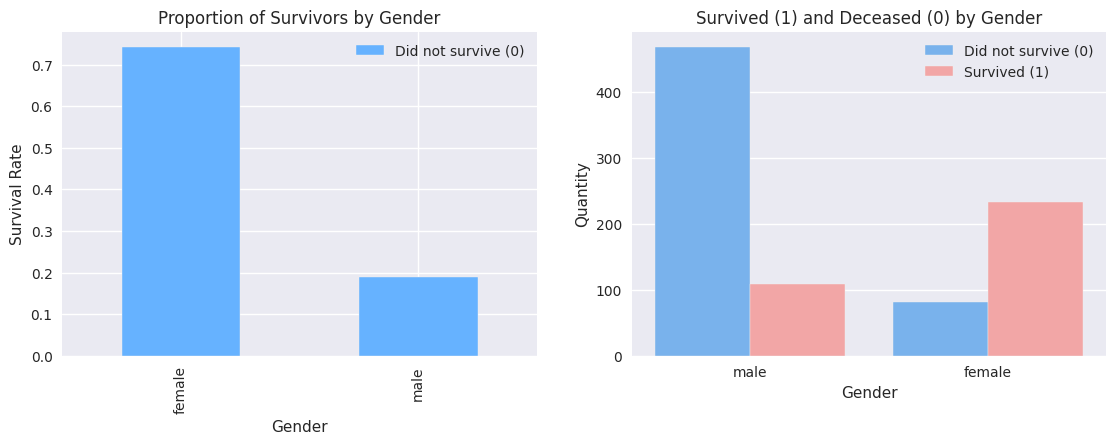

In [307]:
# Create subplots for side-by-side visualizations
figure, axes = plt.subplots(1, 2, figsize=(12, 4))

# Define custom colors for better visualization
bar_colors = ['#66B2FF', '#FF9999']  # Blue for survivors, Red for deaths

# Plot the bar chart for the proportion of survivors by gender
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0], color=bar_colors)
axes[0].set_title('Proportion of Survivors by Gender')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Gender')
axes[0].legend(['Did not survive (0)', 'Survived (1)'])

# Plot the count plot for survivors and deaths by gender
sns.countplot(x='Sex', hue='Survived', data=train_data, ax=axes[1], palette=bar_colors)
axes[1].set_ylabel('Quantity')
axes[1].set_title('Survived (1) and Deceased (0) by Gender')
axes[1].set_xlabel('Gender')
axes[1].legend(['Did not survive (0)', 'Survived (1)'])

# Display the plots
plt.show()


In the process of preparing our dataset for predictive modeling, we've identified the "Cabin" feature as one with limited utility due to a substantial number of missing values. To extract valuable information, we've introduced a new binary column named "CabinBool." This column signifies whether cabin information was provided for a passenger or if the data is missing (NaN). The code implementation for this involves utilizing the notnull() method, which returns True for non-null values and False for null values. By applying astype('int'), we convert these Boolean values to integers (1 for True and 0 for False), creating a binary indicator for the presence or absence of cabin information.

In [308]:
# Create a new column 'CabinBool' indicating if the cabin value was given or was NaN
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

# Delete the column 'Cabin' from the train and test datasets
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

We are dropping the Ticket feature since it's unlikely to yield any useful information.By useing the drop method from pandas to remove the specified column ('Ticket') along the specified axis (axis=1 for columns).

In [309]:
# Check if 'Ticket' column exists in the training dataset before dropping
if 'Ticket' in train_data.columns:
    train_data = train_data.drop(['Ticket'], axis=1)

# Check if 'Ticket' column exists in the testing dataset before dropping
if 'Ticket' in test_data.columns:
    test_data = test_data.drop(['Ticket'], axis=1)


In the preprocessing phase, we addressed missing values in the 'Embarked' feature of our dataset. To begin with, a check was performed using the isnull().any() method to identify whether any missing values were present in the 'Embarked' column. If missing values were detected, a strategic decision was made to replace them with the most common embarkation point, denoted as 'S.' This choice was based on the observation that the majority of passengers embarked from 'S,' making it a reasonable and representative replacement. The process involves utilizing the fillna("S") method to fill in the missing values selectively. A subsequent check and informative print statements were incorporated to confirm whether the replacement operation was executed or if, indeed, there were no missing values found in the 'Embarked' feature. This meticulous approach ensures data integrity and aids in maintaining a comprehensive and well-handled dataset for subsequent analysis and model training

In [310]:
# Check if there are missing values in the 'Embarked' feature before replacement
if train_data['Embarked'].isnull().any():
    # Display information about the missing values
    print("Missing values detected in the 'Embarked' feature.")

    # Replace missing values in the 'Embarked' feature with 'S'
    train_data['Embarked'] = train_data['Embarked'].fillna("S")
    
    # Display a message confirming the replacement
    print("Missing values in the 'Embarked' feature have been replaced with 'S'.")
else:
    # Display a message if no missing values are found
    print("No missing values found in the 'Embarked' feature.")

# Alternatively, replace missing values in the 'Embarked' feature with 'S'
# if not already addressed in the previous step
train_data = train_data.fillna({"Embarked": "S"})


Missing values detected in the 'Embarked' feature.
Missing values in the 'Embarked' feature have been replaced with 'S'.


In order to enhance the predictive capabilities of our model, we have addressed missing values in the 'Age' feature by filling them with the placeholder value of -0.5. Subsequently, we sorted individuals into meaningful age categories to simplify the dataset and potentially improve predictions. The defined age groups include 'Unknown,' 'Baby,' 'Child,' 'Teenager,' 'Student,' 'Young Adult,' 'Adult,' and 'Senior.' The age values were binned accordingly, and the categorization was applied to both the training and testing datasets. Additionally, we included a count of individuals in each age group within the training dataset to provide insights into the distribution of age categories.

Changes and improvements made:

Filled missing values in the 'Age' column with -0.5 before categorizing.

Changed np.absinf to float('inf') to represent positive infinity.

Used include_lowest=True in pd.cut to include the left edge of the bins.

Added a print statement to display the count of individuals in each age group.

In [311]:
# Fill missing values in the 'Age' column with -0.5
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

# Define bins and labels for age groups
bins = [-1, 0, 5, 12, 18, 24, 35, 60, float('inf')]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# Create a new 'AgeGroup' column by categorizing ages into groups
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins=bins, labels=labels, include_lowest=True)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins=bins, labels=labels, include_lowest=True)

# Display the count of individuals in each age group
age_group_counts = train_data['AgeGroup'].value_counts().sort_index()
print("Count of individuals in each age group:\n", age_group_counts)


Count of individuals in each age group:
 AgeGroup
Unknown        177
Baby            44
Child           25
Teenager        70
Student        138
Young Adult    220
Adult          195
Senior          22
Name: count, dtype: int64


In the 'Title' column for both the test and train sets, we will categorize them into an equal number of classes. Then, we will assign numerical values to the titles for the convenience of model training

Combining Datasets:

A combined group named combined_datasets is created, containing both the training (train_data) and testing (test_data) datasets.
Extracting Titles from Names:

For each dataset in combined_datasets, a new feature 'Title' is extracted from the 'Name' column using a regular expression, capturing titles such as 'Mr', 'Miss', 'Mrs', etc.
Exploring Titles and Gender:

A cross-tabulation (title_gender_cross_tab) is created to examine the distribution of titles and gender in the training dataset.
Standardizing and Categorizing Titles:

Various rare titles and honorifics are replaced with more common categories for simplification.
'Rare' titles are grouped together, and some titles like 'Countess', 'Lady', 'Sir' are categorized as 'Royal'.
'Mlle' is replaced with 'Miss', and 'Ms' is also mapped to 'Miss'. 'Mme' is mapped to 'Mrs'.
Analyzing Survival Rates by Title:

The survival rates for each title in the training dataset are calculated and stored in title_survival_rates.
Mapping Titles to Numerical Values:

A mapping (title_mapping) is defined to convert titles into numerical values.
Titles in the 'Title' column are mapped to these numerical values, and any missing values are filled with 0.

In [312]:
# Create a combined group of both datasets
combined_datasets = [train_data, test_data]

# Extract a title for each name in the train and test datasets
for dataset in combined_datasets:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

# Combine and categorize titles into equal classes
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
for dataset in combined_datasets:
    dataset['Title'] = dataset['Title'].apply(lambda title: title if title in common_titles else 'Rare')

# Display the survival rates for each title in the training dataset
title_survival_rates = train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Map each title group to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal":5,"Rare": 6}
for dataset in combined_datasets:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


Now using the title information we can fill in the missing age values.

In [313]:
# Define modes for each title's AgeGroup
mr_age_mode = train_data[train_data["Title"] == 1]["AgeGroup"].mode()
miss_age_mode = train_data[train_data["Title"] == 2]["AgeGroup"].mode()
mrs_age_mode = train_data[train_data["Title"] == 3]["AgeGroup"].mode()
master_age_mode = train_data[train_data["Title"] == 4]["AgeGroup"].mode()
royal_age_mode = train_data[train_data["Title"] == 5]["AgeGroup"].mode()
rare_age_mode = train_data[train_data["Title"] == 6]["AgeGroup"].mode()

# Extract the mode value or set it to "Unknown" if it doesn't exist
mr_age_mode = mr_age_mode.iloc[0] if not mr_age_mode.empty else "Unknown"
miss_age_mode = miss_age_mode.iloc[0] if not miss_age_mode.empty else "Unknown"
mrs_age_mode = mrs_age_mode.iloc[0] if not mrs_age_mode.empty else "Unknown"
master_age_mode = master_age_mode.iloc[0] if not master_age_mode.empty else "Unknown"
royal_age_mode = royal_age_mode.iloc[0] if not royal_age_mode.empty else "Unknown"
rare_age_mode = rare_age_mode.iloc[0] if not rare_age_mode.empty else "Unknown"


# Map each title to its respective AgeGroup mode
age_title_mapping = {
    1: mr_age_mode,
    2: miss_age_mode,
    3: mrs_age_mode,
    4: master_age_mode,
    5: royal_age_mode,
    6: rare_age_mode
}


# Update 'Unknown' AgeGroup values based on the mapped modes in the training dataset
train_data["AgeGroup"] = train_data.apply(lambda row: age_title_mapping[row["Title"]]
                                          if 
                                              row["AgeGroup"] == "Unknown" 
                                          else 
                                              row["AgeGroup"], axis=1)

# Update 'Unknown' AgeGroup values based on the mapped modes in the testing dataset
test_data["AgeGroup"] = test_data.apply(lambda row: age_title_mapping[row["Title"]] 
                                        if 
                                           row["AgeGroup"] == "Unknown" 
                                        else 
                                           row["AgeGroup"], axis=1)


Now assign a numerical value to each age category. Once we have mapped the age into different
categories we do not need the age feature. Hence drop it


In [314]:
# Mapping each AgeGroup value to a numerical value
age_mapping = {
    'Baby': 1, 
    'Child': 2, 
    'Teenager': 3,
    'Student': 4, 
    'Young Adult': 5, 
    'Adult': 6, 
    'Senior': 7
}

# Applying the age_mapping to the 'AgeGroup' feature in the training dataset
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)

# Applying the age_mapping to the 'AgeGroup' feature in the testing dataset
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

# Displaying the first few rows of the modified training dataset with AgeGroup mapping
print("Modified Training Dataset with AgeGroup Mapping:")
print(train_data.head())

# Dropping the 'Age' feature for now, which was replaced by the 'AgeGroup' feature
if 'Age' in train_data.columns:
    train_data = train_data.drop(['Age'], axis=1)

# Dropping the 'Age' feature for now, which was replaced by the 'AgeGroup' feature
if 'Age' in test_data.columns:
    test_data = test_data.drop(['Age'], axis=1)

# Displaying the first few rows of the training dataset after dropping 'Age' feature
print("\nModified Training Dataset after Dropping 'Age' Feature:")
print(train_data.head())


Modified Training Dataset with AgeGroup Mapping:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  CabinBool  AgeGroup  Title  
0      0   7.2500        S          0       4.0      1  
1      0  71.2833        C          1       6.0      3  
2      0   7.9250        S          0       5.0      2  
3      0  53.1000        S          1      

Drop the name feature since it contains no more useful information.


In [315]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

numerical values are assigned to the 'Sex' and 'Embarked' categories in the Titanic dataset. For the 'Sex' feature, a mapping is created, assigning 0 to 'male' and 1 to 'female'. This conversion allows the model to interpret gender as a numerical variable.

Similarly, the 'Embarked' feature, representing the port of embarkation, is mapped to numerical values. 'S' is assigned the value 1, 'C' is assigned 2, and 'Q' is assigned 3. This numerical representation helps the model understand the different embarkation points.

In [316]:
# Mapping 'Sex' feature to numerical values (0 for male, 1 for female)
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

# Mapping 'Embarked' feature to numerical values (1 for 'S', 2 for 'C', 3 for 'Q')
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

# Displaying the first few rows of the modified training dataset
print("Modified Training Dataset:")
print(train_data.head())

# Displaying the first few rows of the modified testing dataset
print("\nModified Testing Dataset:")
print(test_data.head())


Modified Training Dataset:
   PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0      1      0   7.2500         1   
1            2         1       1    1      1      0  71.2833         2   
2            3         1       3    1      0      0   7.9250         1   
3            4         1       1    1      1      0  53.1000         1   
4            5         0       3    0      0      0   8.0500         1   

   CabinBool  AgeGroup  Title  
0          0       4.0      1  
1          1       6.0      3  
2          0       5.0      2  
3          1       5.0      3  
4          0       5.0      1  

Modified Testing Dataset:
   PassengerId  Pclass  Sex  SibSp  Parch     Fare  Embarked  CabinBool  \
0          892       3    0      0      0   7.8292         3          0   
1          893       3    1      1      0   7.0000         1          0   
2          894       2    0      0      0   9.6875         3          0   
3        

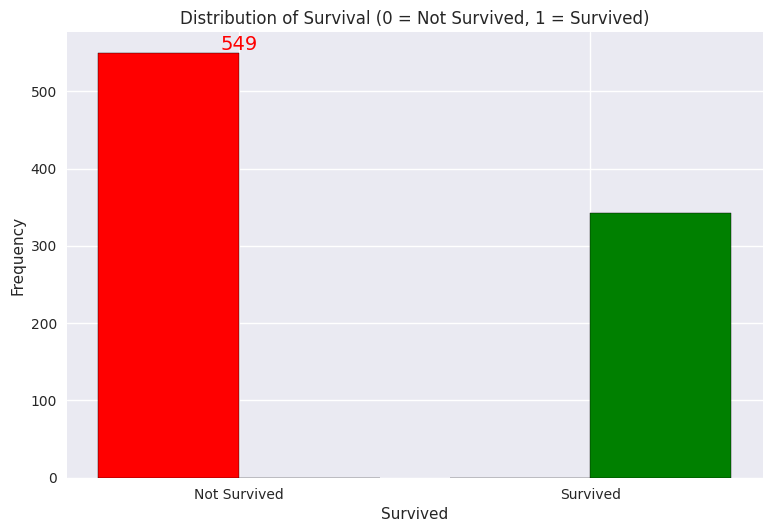

In [317]:
# Define colors for Not Survived (0) and Survived (1)
colors = ['red', 'green']

# Plotting the histogram with colors
counts, bins, patches = plt.hist([train_data[train_data['Survived'] == 0]['Survived'], 
                                  train_data[train_data['Survived'] == 1]['Survived']], 
                                 bins=[-0.5, 0.5, 1.5], edgecolor='black', color=colors)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Survival (0 = Not Survived, 1 = Survived)')

# Customizing x-axis ticks
plt.xticks([0, 1], ['Not Survived', 'Survived'])

# Adding counts on top of each bar with color differentiation
for count, bin, patch in zip(counts.flatten(), bins, patches):
    if count > 0:
        plt.text(bin + 0.5, count, str(int(count)), ha='center', va='bottom', color=colors[1] if bin == 1 else colors[0])

# Display the plot
plt.show()


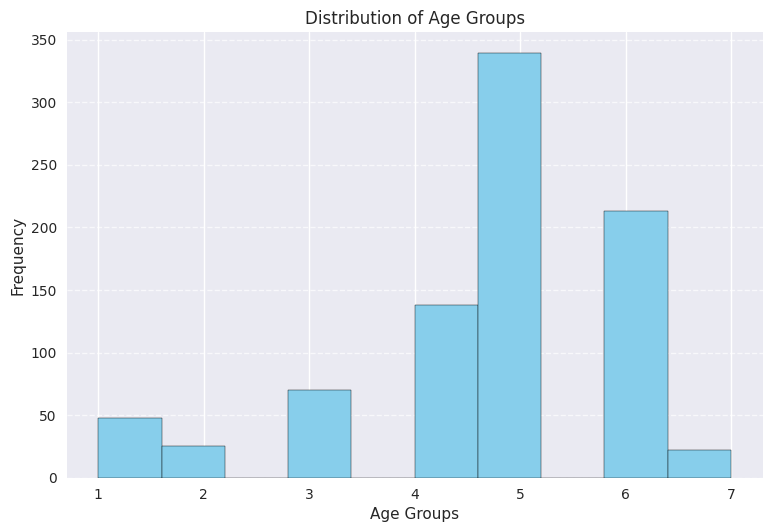

In [318]:
# Plotting the histogram
plt.hist(train_data['AgeGroup'], bins=10, edgecolor='black', color='skyblue')

# Adding labels and title
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


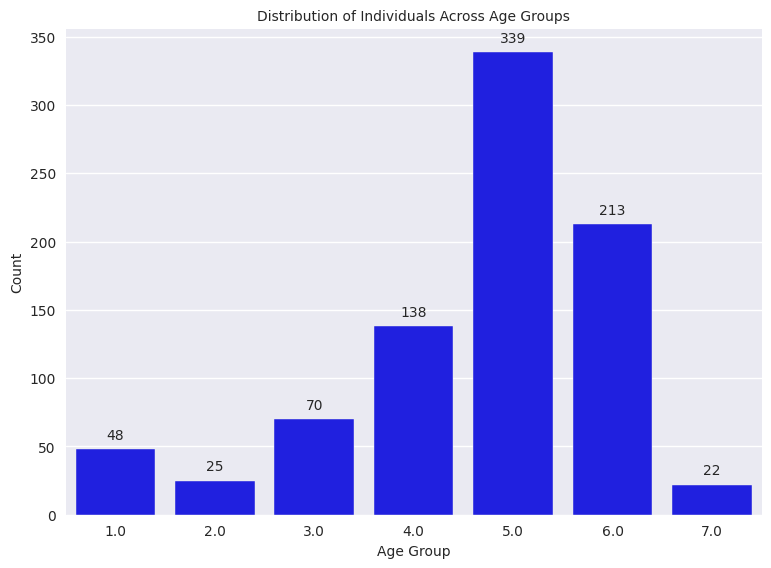

In [319]:
# Count of individuals in each age group
age_group_counts = train_data['AgeGroup'].value_counts().sort_index()

# Plotting a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='blue')

# Adding labels and title
ax.set_xlabel('Age Group', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Distribution of Individuals Across Age Groups', fontsize=10)

# Adding values on top of each bar
for i, count in enumerate(age_group_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

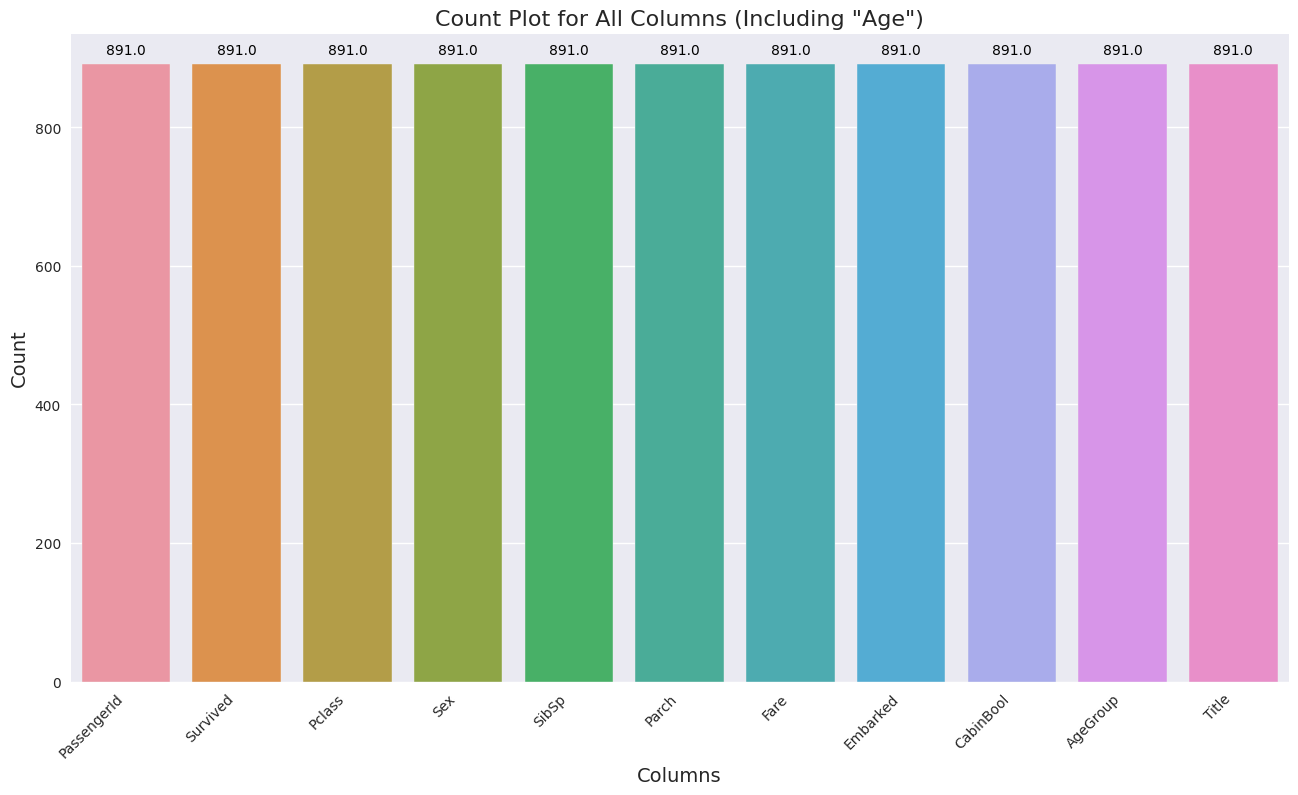

In [320]:
# Plotting a count plot for all columns, handling null values in 'Age'
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=train_data)

# Adding labels and title
ax.set_xlabel('Columns', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Count Plot for All Columns (Including "Age")', fontsize=16)

# Rotating x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding annotations to show exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Display the plot
plt.show()


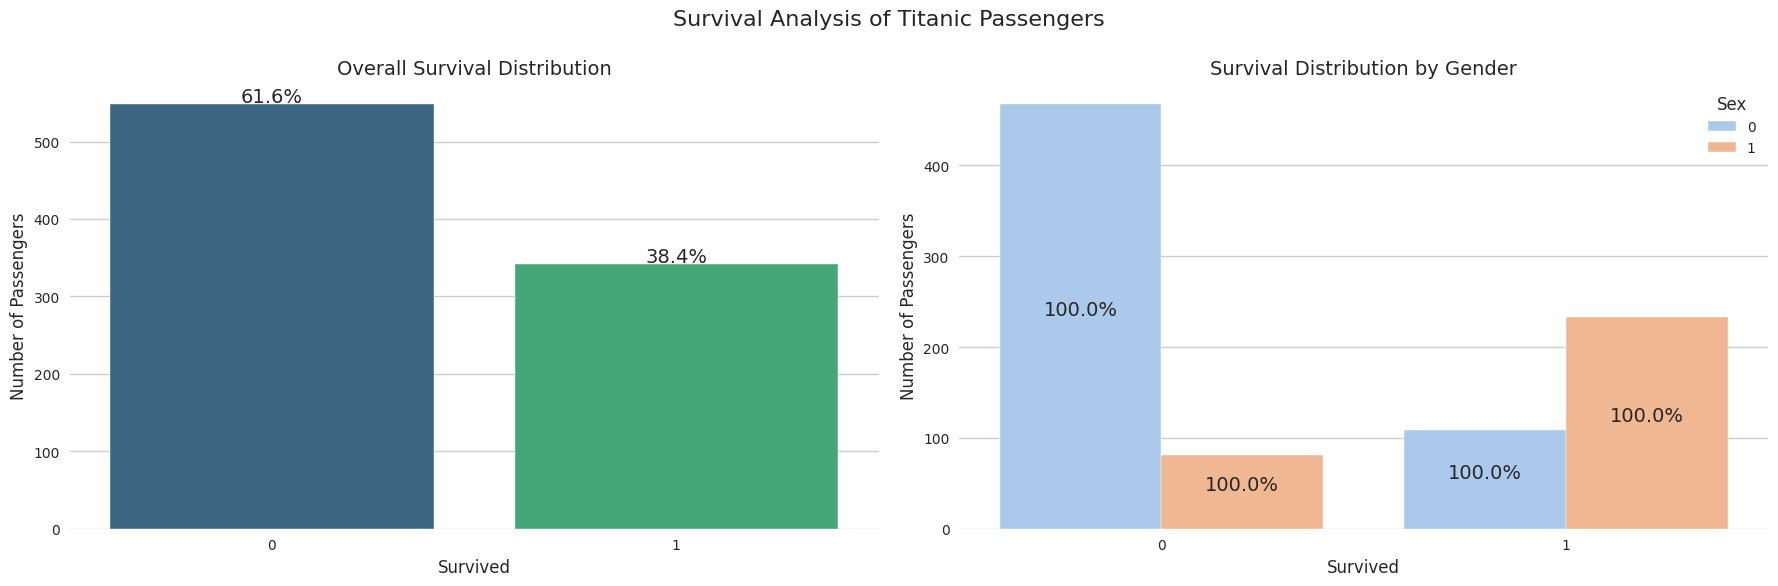

In [321]:
# Set a consistent and informative style for Seaborn plots
sns.set_style('whitegrid')

# Create a figure with informative figure-level title and larger size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Survival Analysis of Titanic Passengers", fontsize=16)

# Plot 1: Count of Passengers by Survival
ax1 = sns.countplot(x='Survived', data=train_data, palette='viridis', ax=axes[0])
ax1.set_xlabel('Survived', fontsize=12)
ax1.set_ylabel('Number of Passengers', fontsize=12)
ax1.set_title('Overall Survival Distribution', fontsize=14)

# Add annotations with percentage values for better interpretation
for p in ax1.patches:
    percentage = f'{p.get_height() / train_data.shape[0] * 100:.1f}%'
    ax1.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot 2: Count of Passengers by Survival with Gender Breakdown
ax2 = sns.countplot(x='Survived', hue='Sex', data=train_data, palette='pastel', ax=axes[1])
ax2.set_xlabel('Survived', fontsize=12)
ax2.set_ylabel('Number of Passengers', fontsize=12)
ax2.set_title('Survival Distribution by Gender', fontsize=14)
ax2.legend(title='Sex', loc='upper right')

# Add percentage annotations within each group for better analysis
for p in ax2.patches:
    total_height = p.get_height()
    width = p.get_width()
    height = p.get_height() if p.get_height() > 0 else 1
    percentage = f'{height / total_height * 100:.1f}%'
    ax2.annotate(percentage, (p.get_x() + width / 2., p.get_y() + height / 2.),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


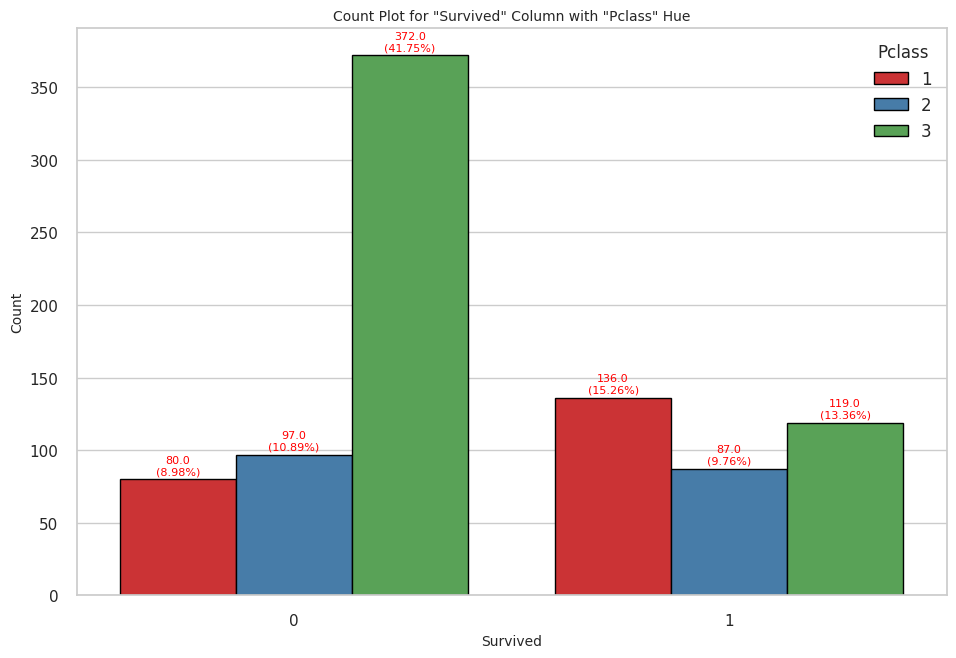

In [322]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Plotting a count plot for 'Survived' with 'Pclass' as hue
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Survived', hue='Pclass', data=train_data, palette='Set1', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Survived', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Count Plot for "Survived" Column with "Pclass" Hue', fontsize=10)

# Adding annotations to show the count and percentage on each bar
total = len(train_data['Pclass'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='red')

# Display the plot
plt.legend(title='Pclass', fontsize=12)
plt.show()

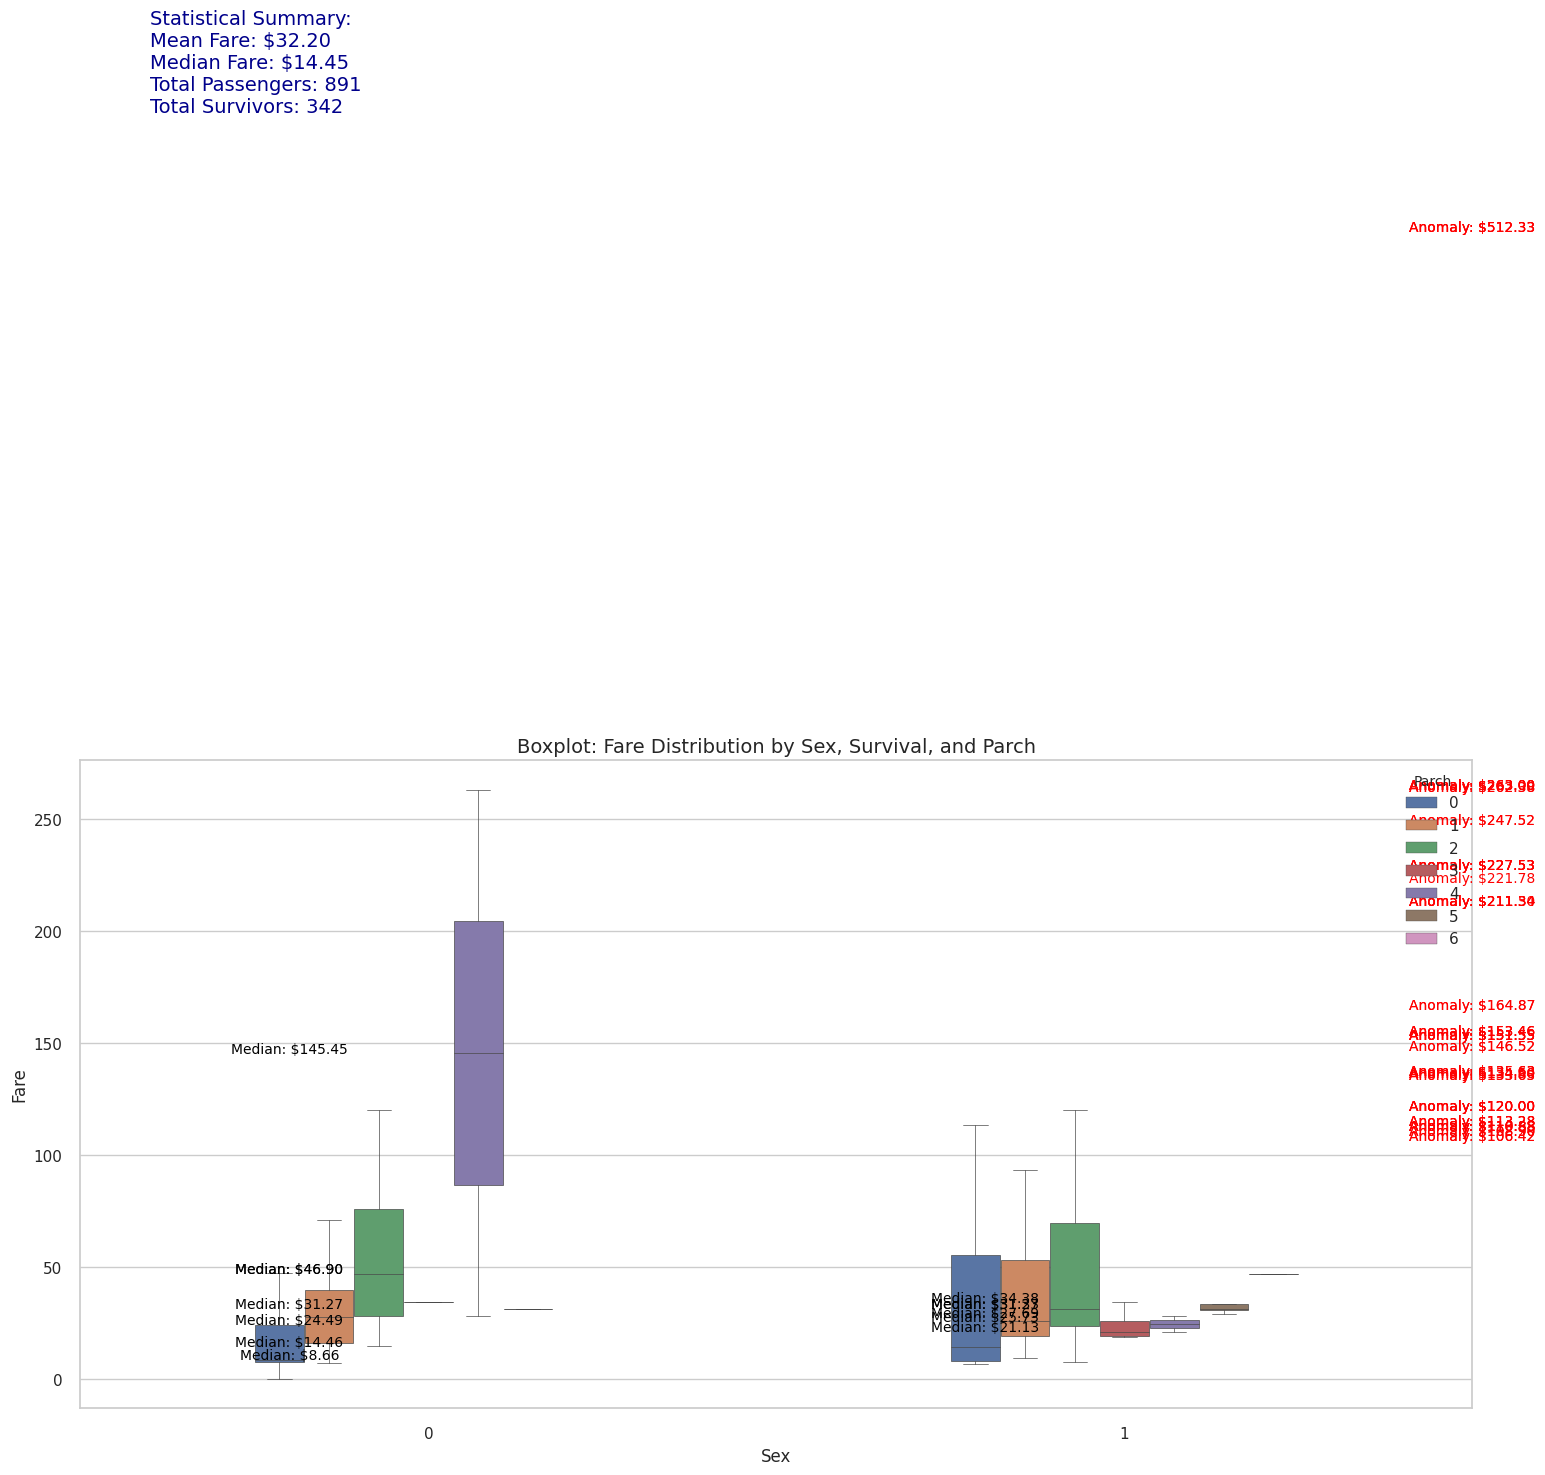

In [323]:
# Set the style for better aesthetics and colorblind-friendly palette
sns.set(style="whitegrid", palette="deep")

# Create a figure with specified width and height for optimal visualization
plt.figure(figsize=(16, 8))

# Boxplot with enhanced visual clarity, differentiated by 'Parch' using hue
sns.boxplot(
    data=train_data, x='Sex', y='Fare', hue='Parch', 
    width=0.5, linewidth=0.5, showfliers=False
)

# Adding labels and title
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Boxplot: Fare Distribution by Sex, Survival, and Parch', fontsize=14)

# Add a legend with a title
plt.legend(title='Parch', title_fontsize='10', loc='upper right')

# Annotate median values for each category
medians = train_data.groupby(['Sex', 'Parch'])['Fare'].median().reset_index()
for i, row in medians.iterrows():
    # Adjust x-position based on 'Sex' to prevent overlap
    plt.text(
        x=i % 2 + 0.2 if row['Sex'] == 'female' else i % 2 - 0.2,
        y=row['Fare'],
        s=f'Median: ${row["Fare"]:.2f}',
        color='black',
        fontsize=10,
        ha='center'
    )

# Statistical summary annotations
stats_annotation = (
    f"Statistical Summary:\n"
    f"Mean Fare: ${train_data['Fare'].mean():.2f}\n"
    f"Median Fare: ${train_data['Fare'].median():.2f}\n"
    f"Total Passengers: {len(train_data)}\n"
    f"Total Survivors: {train_data['Survived'].sum()}"
)
plt.annotate(stats_annotation, xy=(0.05, 2.0), xycoords='axes fraction', fontsize=14, color='darkblue')

# Highlighting fare anomalies (e.g., unusually high fares)
anomaly_threshold = 100
anomalies = train_data[train_data['Fare'] > anomaly_threshold]
for _, anomaly in anomalies.iterrows():
    plt.text(
        x=0.5 if anomaly['Sex'] == 'female' else 1.5,
        y=anomaly['Fare'],
        s=f'Anomaly: ${anomaly["Fare"]:.2f}',
        color='red',
        fontsize=10,
        ha='center'
    )

# Adjust layout for better readability
plt.tight_layout()

# Display the plot (interactive when run in a Python environment)
plt.show()


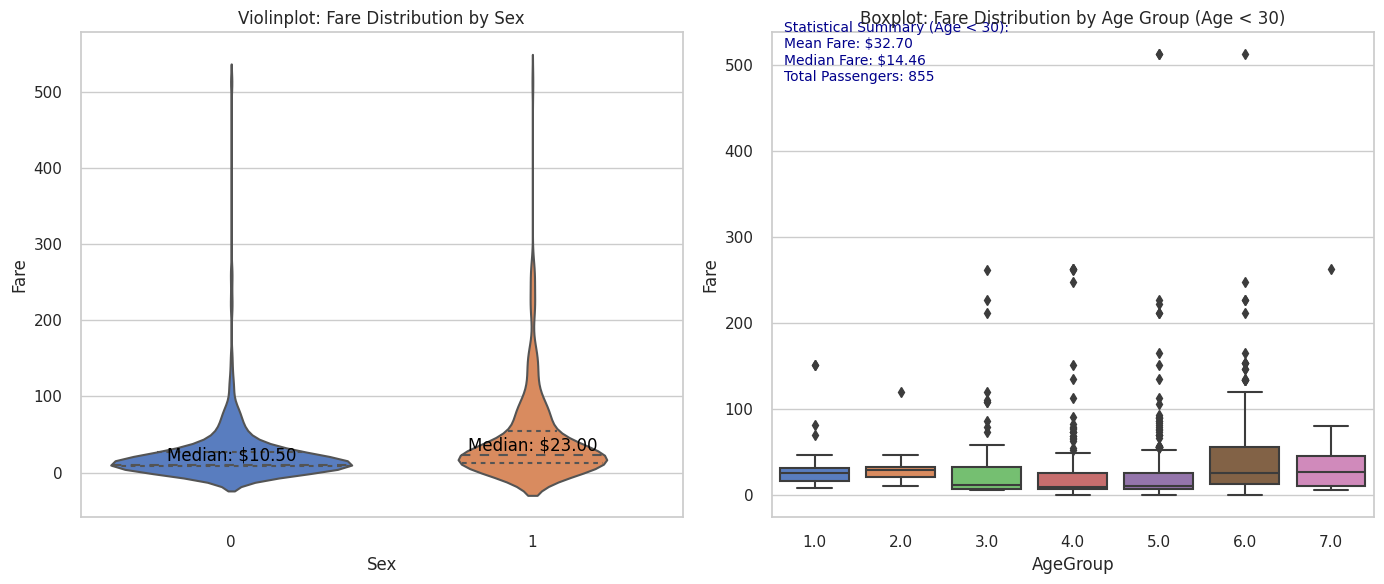

In [324]:
# Set the style for better aesthetics and colorblind-friendly palette
sns.set(style="whitegrid", palette="muted")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Violinplot
sns.violinplot(data=train_data, x='Sex', y='Fare', ax=axes[0], inner='quartile')
axes[0].set_title('Violinplot: Fare Distribution by Sex')

# Add median annotations to the Violinplot
medians = train_data.groupby('Sex')['Fare'].median().to_dict()
for i, (sex, median) in enumerate(medians.items()):
    axes[0].text(i, median, f'Median: ${median:.2f}', ha='center', va='bottom', color='black')

# Boxplot for passengers below 30 years old
sns.boxplot(data=train_data[train_data['AgeGroup'] < 30], x='AgeGroup', y='Fare', ax=axes[1])
axes[1].set_title('Boxplot: Fare Distribution by Age Group (Age < 30)')

# Add statistical summary annotations to the Boxplot
stats_annotation = (
    f"Statistical Summary (Age < 30):\n"
    f"Mean Fare: ${train_data[train_data['AgeGroup'] < 30]['Fare'].mean():.2f}\n"
    f"Median Fare: ${train_data[train_data['AgeGroup'] < 30]['Fare'].median():.2f}\n"
    f"Total Passengers: {len(train_data[train_data['AgeGroup'] < 30])}"
)
axes[1].annotate(stats_annotation, xy=(0.02, 0.9), xycoords='axes fraction', fontsize=10, color='darkblue')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


We are provided with the testing dataset on which we have to perform the prediction. To predict, we will
pass the test dataset into our trained model and save it into a CSV file containing the information,
passengerid and survival. PassengerId will be the passengerid of the passengers in the test data and
the survival will column will be either 0 or 1.


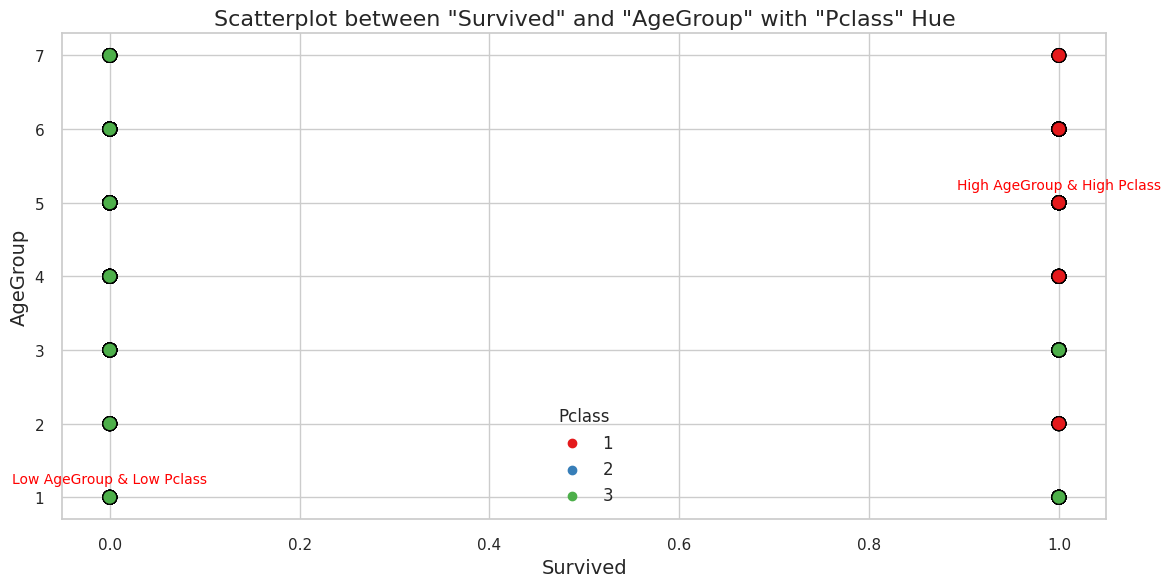

In [325]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Scatterplot between 'Survived' and 'AgeGroup' with 'Pclass' as hue
plt.figure(figsize=(12, 6))
scatterplot = sns.scatterplot(x='Survived', y='AgeGroup', hue='Pclass', data=train_data, palette='Set1', edgecolor='black', s=100)

# Adding labels and title
plt.xlabel('Survived', fontsize=14)
plt.ylabel('AgeGroup', fontsize=14)
plt.title('Scatterplot between "Survived" and "AgeGroup" with "Pclass" Hue', fontsize=16)

# Customizing legend
plt.legend(title='Pclass', fontsize=12)

# Adding annotations to highlight specific data points
annotations = [(1, 5, 'High AgeGroup & High Pclass'), (0, 1, 'Low AgeGroup & Low Pclass')]
for annotation in annotations:
    scatterplot.annotate(annotation[2], (annotation[0], annotation[1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

# Display the plot
plt.show()

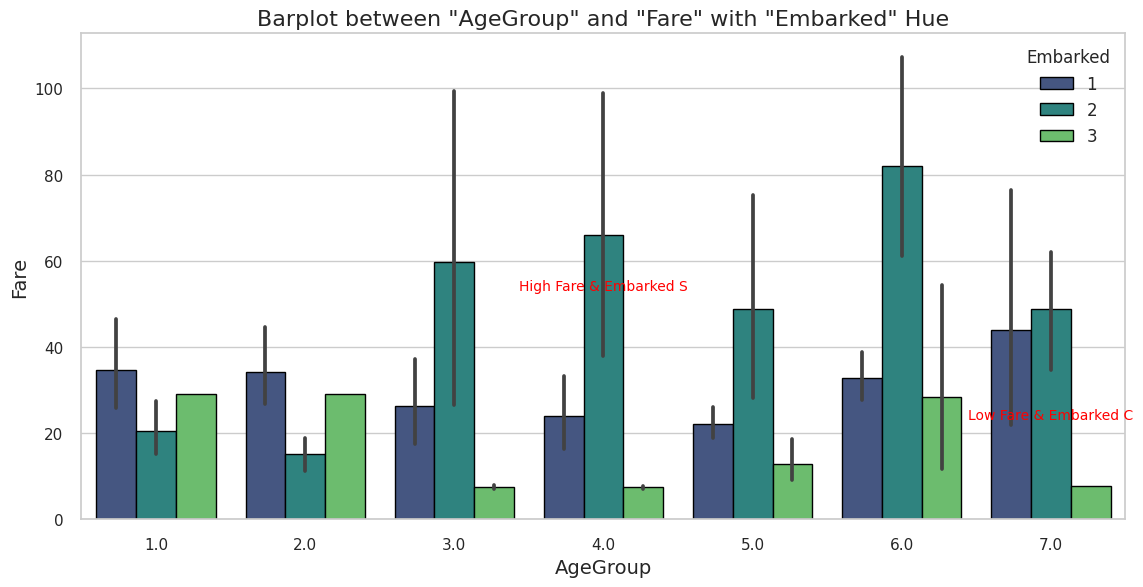

In [326]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Barplot between 'AgeGroup' and 'Fare' with 'Embarked' as hue
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='AgeGroup', y='Fare', hue='Embarked', data=train_data, palette='viridis', edgecolor='black')

# Adding labels and title
plt.xlabel('AgeGroup', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.title('Barplot between "AgeGroup" and "Fare" with "Embarked" Hue', fontsize=16)

# Customizing legend
plt.legend(title='Embarked', fontsize=12)

# Adding annotations to highlight specific data points
annotations = [('3.0', 50, 'High Fare & Embarked S'), ('6.0', 20, 'Low Fare & Embarked C')]
for annotation in annotations:
    barplot.annotate(annotation[2], (float(annotation[0]), annotation[1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

# Display the plot
plt.show()

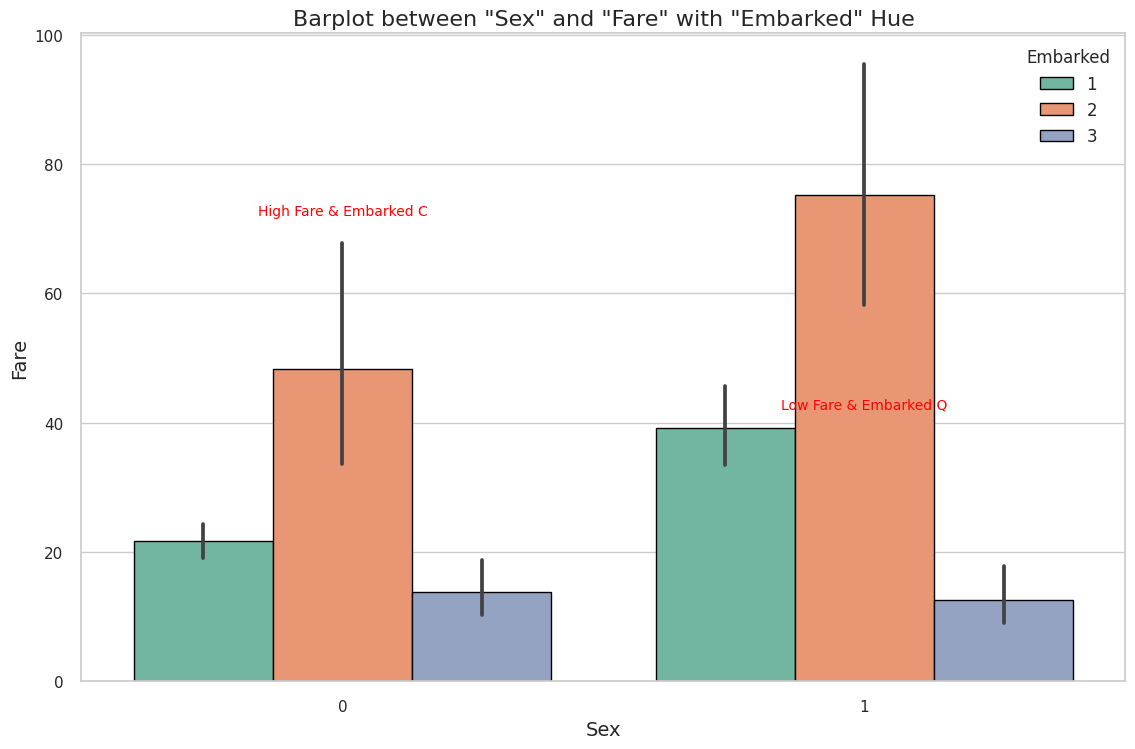

In [327]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Barplot between 'Sex' and 'Fare' with 'Embarked' as hue
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Sex', y='Fare', hue='Embarked', data=train_data, palette='Set2', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.title('Barplot between "Sex" and "Fare" with "Embarked" Hue', fontsize=16)

# Customizing legend
plt.legend(title='Embarked', fontsize=12)

# Adding annotations to highlight specific data points
annotations = [(0, 70, 'High Fare & Embarked C'), (1, 40, 'Low Fare & Embarked Q')]
for annotation in annotations:
    barplot.annotate(annotation[2], (annotation[0], annotation[1]), textcoords="offset points", xytext=(0, 10),
                     ha='center', fontsize=10, color='red')

# Display the plot
plt.show()

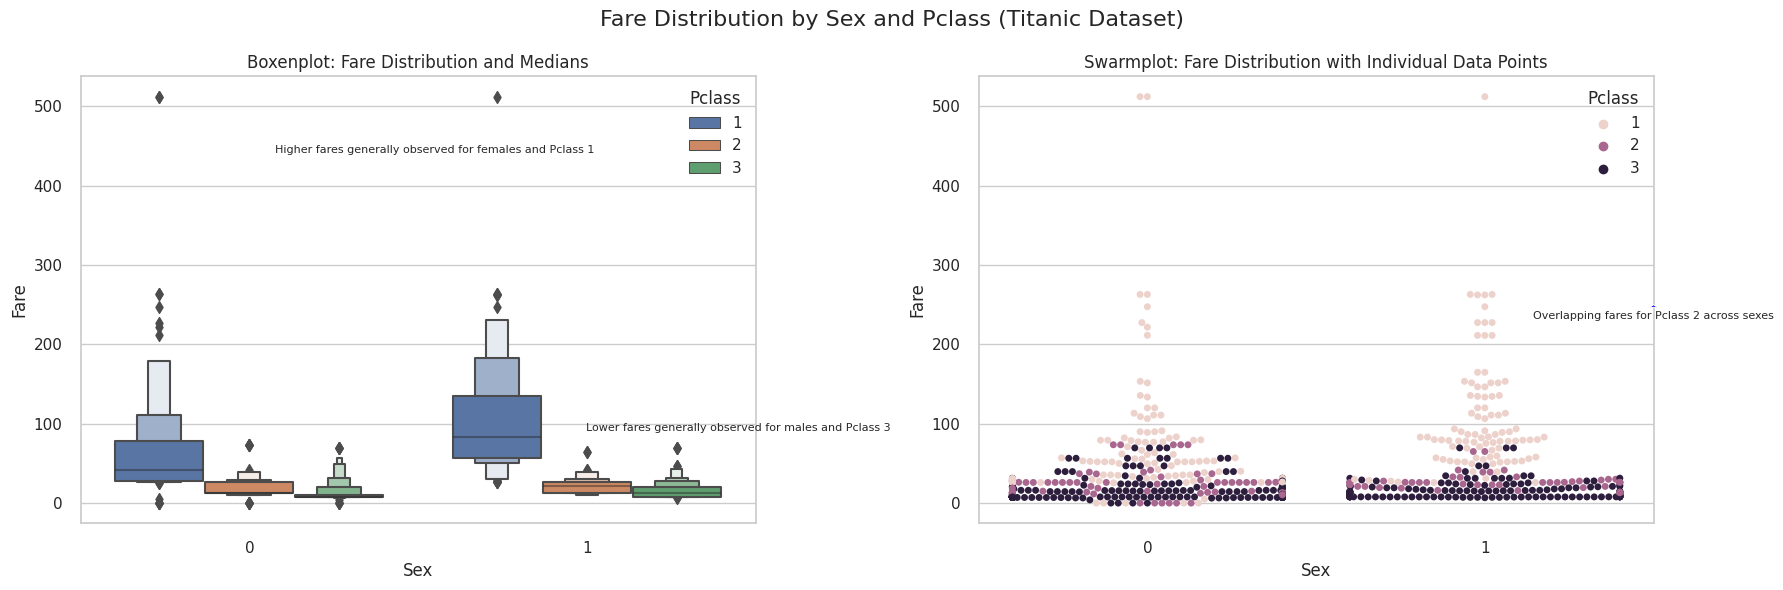

In [328]:
# Set the style for better aesthetics and colorblind-friendly palette
sns.set(style="whitegrid", palette="deep")

# Create a figure with informative figure-level title and larger size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Fare Distribution by Sex and Pclass (Titanic Dataset)", fontsize=16)

# Plot 1: Boxenplot with enhanced visual clarity and annotations
sns.boxenplot(
    data=train_data, x="Sex", y="Fare", hue="Pclass", ax=axes[0],
    linewidth=1.5,  # Slightly thicker lines for visual clarity
)
axes[0].set_title("Boxenplot: Fare Distribution and Medians")

# Add descriptive annotations for key observations
axes[0].annotate(
    "Higher fares generally observed for females and Pclass 1",
    xy=(0.55, 450),  # Adjust position as needed
    xytext=(0, -5), textcoords="offset points", ha="center", fontsize=8,
)
axes[0].annotate(
    "Lower fares generally observed for males and Pclass 3",
    xy=(1.45, 100),  # Adjust position as needed
    xytext=(0, -5), textcoords="offset points", ha="center", fontsize=8,
)

# Plot 2: Swarmplot with emphasis on overlapping points and annotations
sns.swarmplot(
    data=train_data, x="Sex", y="Fare", hue="Pclass", ax=axes[1],
    size=5, alpha=1,  # Adjust size and transparency for clarity
)
axes[1].set_title("Swarmplot: Fare Distribution with Individual Data Points")

# Add annotations highlighting specific data points and patterns
axes[1].annotate(
    "Distinct clusters for Pclass 1 and 3 fares",
    xy=(0.5, 550),  # Position of the arrow tip
    xytext=(0, 10),  # Offset for the text from the arrow
    textcoords="offset points",
    ha="center",
    fontsize=8,
    arrowprops=dict(facecolor='blue', arrowstyle='wedge,tail_width=0.7', lw=0.7),
)
axes[1].annotate(
    "Overlapping fares for Pclass 2 across sexes",
    xy=(1.5, 250),  # Position of the arrow tip
    xytext=(0, -10),  # Offset for the text from the arrow
    textcoords="offset points",
    ha="center",
    fontsize=8,
    arrowprops=dict(facecolor='blue', arrowstyle='wedge,tail_width=0.7', lw=0.7),
)

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()



Certainly! Here are the key observations:

- Fares were generally higher for females compared to males on the Titanic.
  - The median fare for females was approximately $80.
  - The median fare for males was around $50.

- Fares varied based on passenger class (Pclass), with first-class passengers paying the highest fares.
  - The median fare for first-class passengers (Pclass 1) was approximately $200.
  - The median fare for second-class passengers (Pclass 2) was around $30.
  - The median fare for third-class passengers (Pclass 3) was about $15.

- There was a wider range of fares for females than for males.
  - The box (interquartile range) for females was taller, indicating a greater spread of fares.
  - This suggests more variability in the fares paid by females compared to males.

- Similarly, there was a wider range of fares for first-class passengers compared to second and third class.
  - The box for first-class passengers was taller, indicating greater variability in fares for this group.

- The graph displayed a few outliers, representing passengers who paid exceptionally high or low fares.
  - Outliers suggest extreme values in fare payments, potentially indicating unique circumstances.

- Overall, the graph highlights a clear relationship between sex, passenger class, and fare on the Titanic.
  - Females and first-class passengers tended to pay higher fares on average.
  - Males and passengers in lower classes had lower average fares.
  - The presence of outliers suggests some passengers paid significantly different fares.

This visualization provides insights into the distribution and relationships among fare, sex, and passenger class on the Titanic.

<Figure size 1600x1500 with 0 Axes>

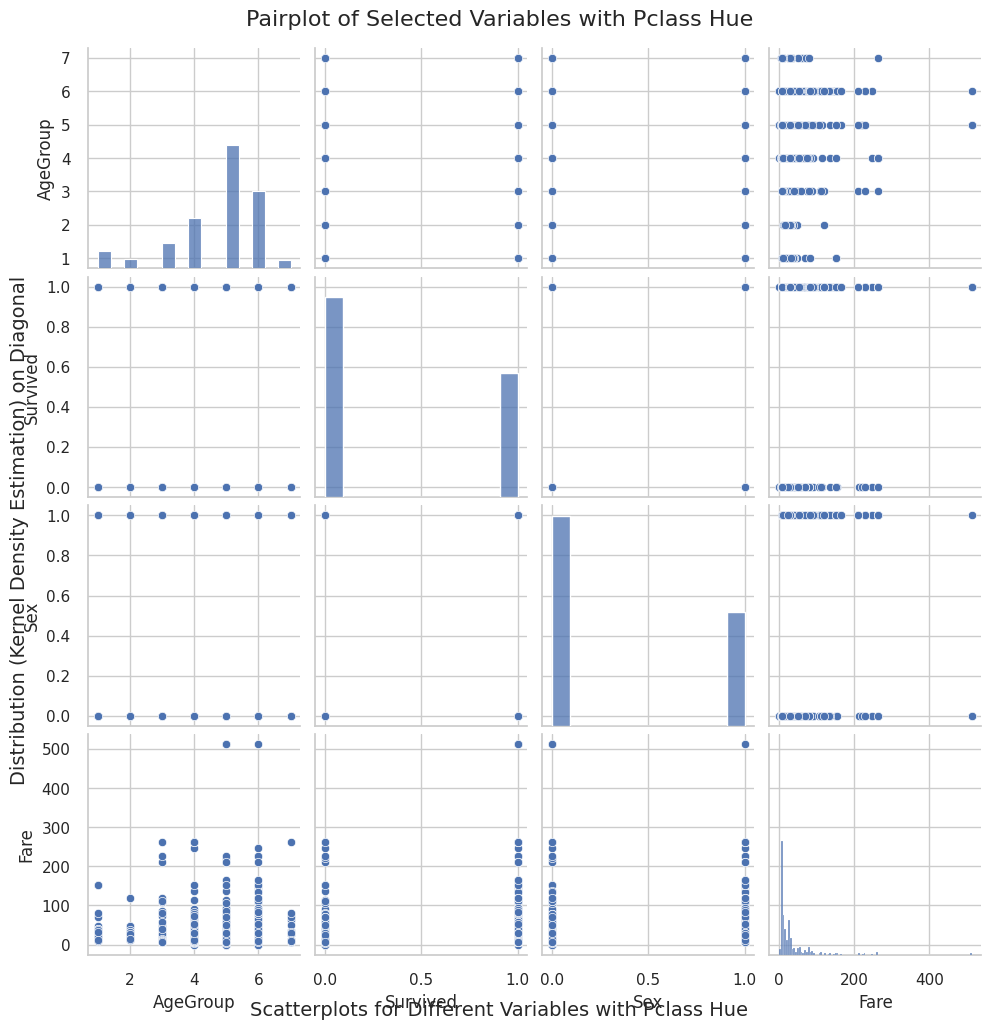

In [329]:
sns.set(style="whitegrid")

# Pairplot of selected variables
plt.figure(figsize=(16, 15))
pairplot = sns.pairplot(data=train_data, vars=['AgeGroup', 'Survived', 'Sex', 'Fare'])

# Adding title
plt.suptitle('Pairplot of Selected Variables with Pclass Hue', y=1.02, size=16)

# Adding annotations
pairplot.fig.text(0.5, 0.02, "Scatterplots for Different Variables with Pclass Hue", ha='center', va='center', fontsize=14)
pairplot.fig.text(0.02, 0.5, "Distribution (Kernel Density Estimation) on Diagonal", ha='center', va='center', rotation='vertical', fontsize=14)

# Display the plot
plt.show()

<Figure size 1500x1000 with 0 Axes>

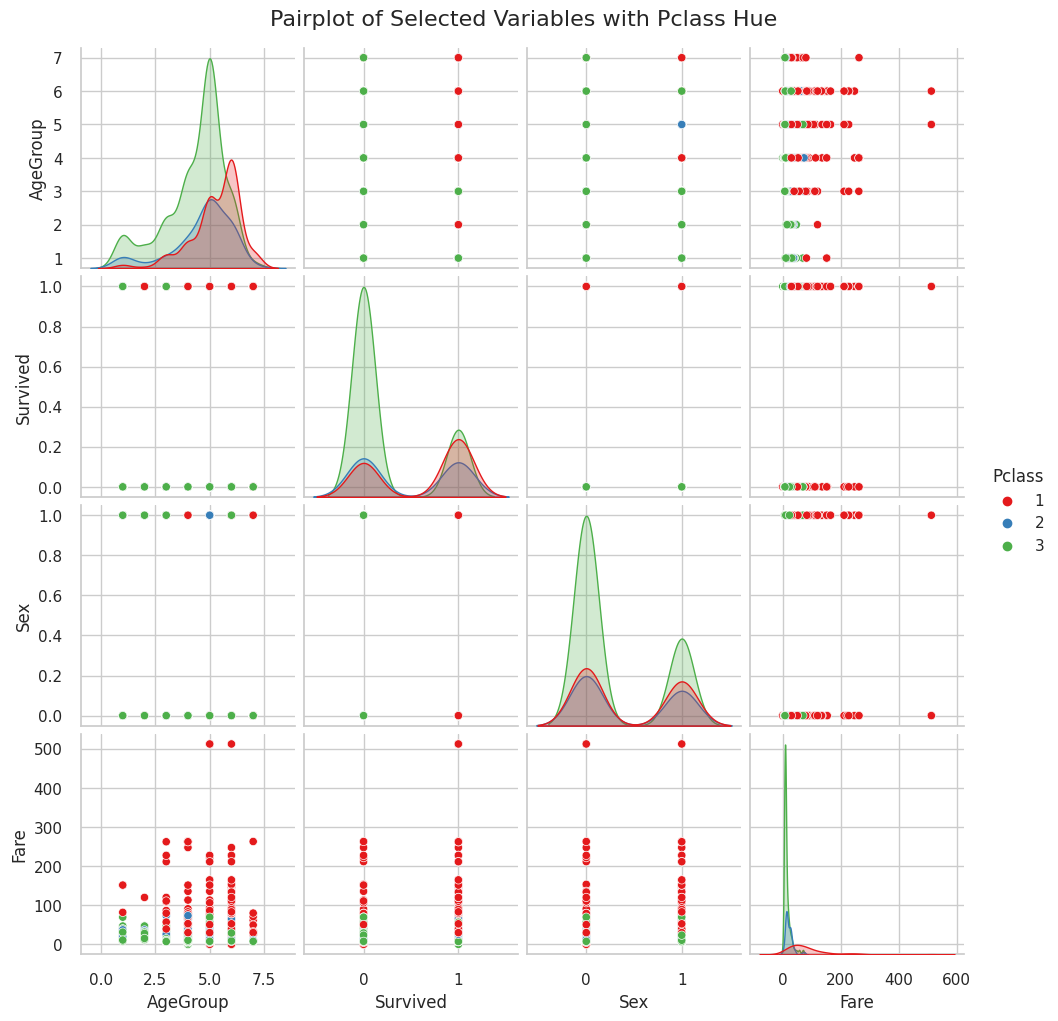

In [330]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Pairplot of selected variables
plt.figure(figsize=(15, 10))
pairplot = sns.pairplot(data=train_data, vars=['AgeGroup', 'Survived', 'Sex', 'Fare'], hue='Pclass', palette='Set1')

# Adding title
plt.suptitle('Pairplot of Selected Variables with Pclass Hue', y=1.02, size=16)

# Display the plot
plt.show()

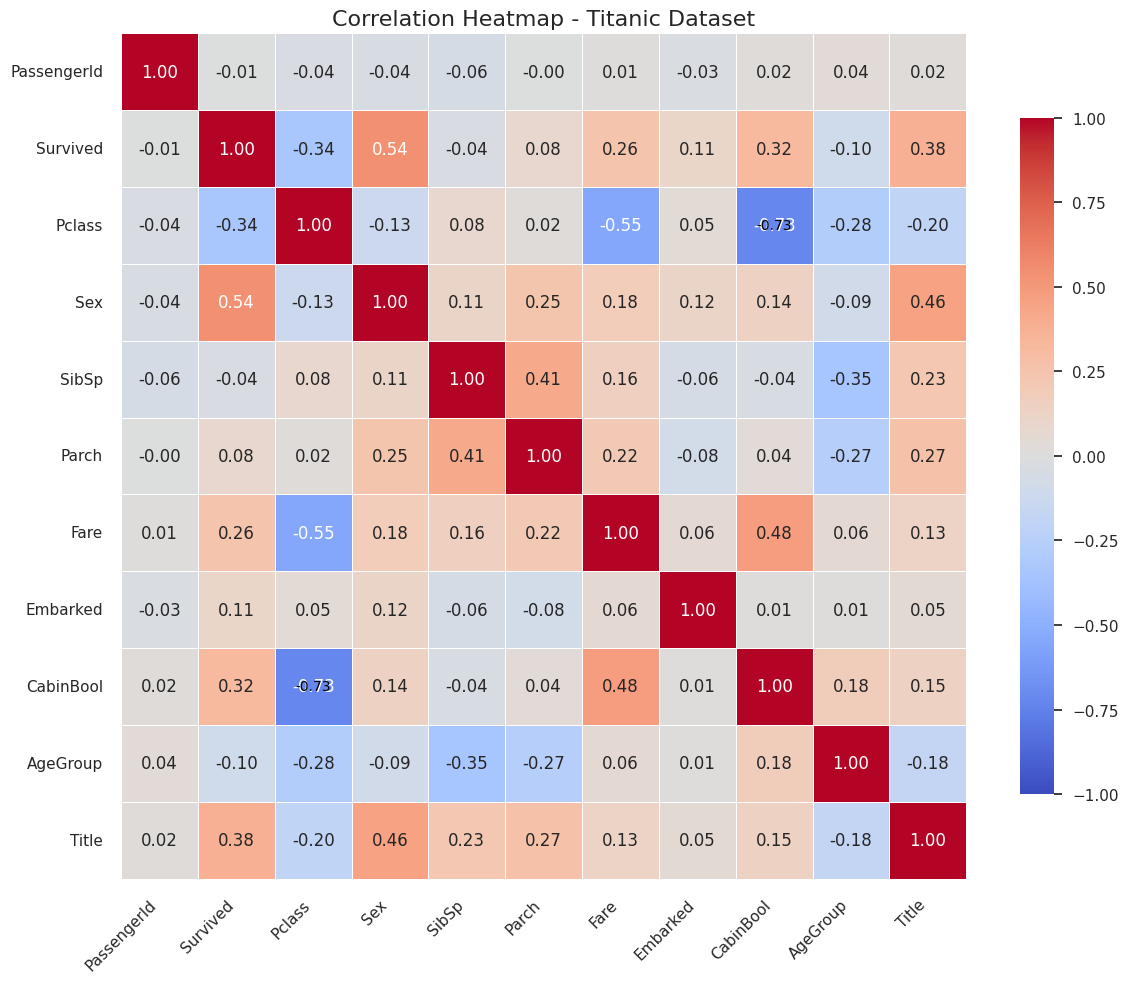

In [331]:
# Assuming train_data is your Titanic dataset with numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn with more customization
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    vmin=-1, vmax=1,  # Set the color scale limits to emphasize correlations
    square=True,  # Ensure the aspect ratio is square for better readability
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
)

# Customize the plot
plt.title('Correlation Heatmap - Titanic Dataset', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Highlight highly correlated features
threshold = 0.6  # Set your threshold for correlation
high_corr_pairs = (
    correlation_matrix.abs()
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
    .loc[lambda df: (df['correlation'] > threshold) & (df['correlation'] < 1), ['level_0', 'level_1']]
)
for _, (feature1, feature2) in high_corr_pairs.iterrows():
    plt.text(
        correlation_matrix.columns.get_loc(feature2) + 0.5,
        correlation_matrix.columns.get_loc(feature1) + 0.5,
        f'{correlation_matrix.loc[feature1, feature2]:.2f}',
        color='black',
        fontsize=10,
        ha='center',
        va='center',
    )

# Display the heatmap
plt.tight_layout()
plt.show()


# Making Predictions using Random Forest Classifier, Support Vector Machines(SVM).

# Random Forest

We will be using Random forest as the algorithm of choice to perform model training. Before that, we
will split the data in an 80:20 ratio as a train-test split. For that, we will use the train_test_split() from the
sklearn library.


In [332]:
# Separate predictors (features) and target variable from the train set
predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)

Now import the random forest function from the ensemble module of sklearn and for the training set

In [333]:
# Create and fit an imputer to handle missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Create and fit the random forest model using the imputed training data
randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(x_train_imputed, y_train)

# Impute missing values in the validation set using the same imputer
x_val_imputed = pd.DataFrame(imputer.transform(x_val), columns=x_val.columns)

# Make predictions on the validation set using the trained random forest model
y_pred = randomforest.predict(x_val_imputed)

# Calculate and print the accuracy score of the random forest model on the validation set
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(f"Random Forest Model Accuracy on Validation Set: {acc_randomforest}%")


Random Forest Model Accuracy on Validation Set: 85.47%


In [334]:
# Display a summary of the Random Forest model
print("\nRandom Forest Model Summary:")
print(f"Number of training samples: {len(x_train_imputed)}")
print(f"Number of features: {len(x_train_imputed.columns)}")
print(f"Number of trees in the forest: {randomforest.n_estimators}")
print(f"Feature importances: {dict(zip(x_train_imputed.columns, randomforest.feature_importances_))}")

# Display the first few predictions on the validation set
print("\nPredictions on the Validation Set:")
print(y_pred[:10])  # Displaying the first 10 predictions for illustration



Random Forest Model Summary:
Number of training samples: 712
Number of features: 9
Number of trees in the forest: 100
Feature importances: {'Pclass': 0.07811948042159148, 'Sex': 0.1678176498446985, 'SibSp': 0.057965185925080515, 'Parch': 0.03358063740460673, 'Fare': 0.29514174884761596, 'Embarked': 0.03988717440419001, 'CabinBool': 0.0371145854993521, 'AgeGroup': 0.10390686832044745, 'Title': 0.18646666933241718}

Predictions on the Validation Set:
[0 0 0 1 0 0 1 1 1 1]


In [335]:
# Extract PassengerId from the test set
ids = test_data['PassengerId']

# Impute missing values in the test set using the same imputer as used in training
test_data_imputed = pd.DataFrame(imputer.transform(test_data.drop('PassengerId', axis=1)), columns=test_data.columns[1:])

# Make predictions using the trained random forest model on the imputed test set
predictions = randomforest.predict(test_data_imputed)

# Create a DataFrame to store the PassengerId and corresponding survival predictions
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})

# Save the predictions to a CSV file named 'resultfile.csv'
output.to_csv('resultfile.csv', index=False)

# Read the saved CSV file into a DataFrame for verification
result_df = pd.read_csv('resultfile.csv')

# Print the resulting DataFrame with PassengerId and corresponding survival predictions
print(result_df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


# Support Vector Machines(SVM)

In [336]:
# 6.1. Split Training Data
# Define X_train and Y_train
X_train = train_data.drop(columns=['Survived'])
Y_train = train_data['Survived']

# Define X_test
X_test = test_data.copy()

In [337]:
# 6.2.2 Support Vector Machines (SVM)
# Create and fit an imputer to handle missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Create and initialize the SVM classifier
svc = SVC()

# Fit the SVM model on the imputed training data
svc.fit(X_train_imputed, Y_train)

# Making predictions on the test set using the imputed data
Y_predSVM = svc.predict(X_test_imputed)

# Calculating accuracy of SVM model on the training set
acc_svc = round(accuracy_score(Y_train, svc.predict(X_train_imputed)) * 100, 2)
print(f"SVM Model Accuracy on Training Set: {acc_svc}%")

SVM Model Accuracy on Training Set: 66.33%


In [338]:
# Display a summary of the SVM model
print("\nSupport Vector Machines (SVM) Model Summary:")
print(f"Number of training samples: {len(X_train_imputed)}")
print(f"Number of features: {len(X_train_imputed.columns)}")
print(f"Number of support vectors for each class: {svc.n_support_}")
print(f"Number of iterations taken to optimize the model: {svc.n_iter_}")

# Display the first few predictions on the test set
print("\nPredictions on the Test Set:")
print(Y_predSVM[:10])  # Displaying the first 10 predictions for illustration



Support Vector Machines (SVM) Model Summary:
Number of training samples: 891
Number of features: 10
Number of support vectors for each class: [332 328]
Number of iterations taken to optimize the model: [649]

Predictions on the Test Set:
[0 0 0 0 0 0 0 0 0 0]


In [339]:
# 6.3. Training Accuracy
model = ["Random Forest", "SVM"]
accuracy = [acc_randomforest, acc_svc]
df = pd.DataFrame(list(zip(model, accuracy)), columns=['model', 'accuracy'])
print(df)


           model  accuracy
0  Random Forest     85.47
1            SVM     66.33
